Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [6]:
import yfinance as yf
import pandas as pd


tesla = yf.Ticker("TSLA")
tsla_data = tesla.history(start="2020-01-01", end="2025-07-01")


tsla_data.reset_index(inplace=True)


tsla_data.to_csv("tesla_stock_data.csv", index=False)


print(tsla_data.head())


                       Date       Open       High        Low      Close  \
0 2020-01-02 00:00:00-05:00  28.299999  28.713333  28.114000  28.684000   
1 2020-01-03 00:00:00-05:00  29.366667  30.266666  29.128000  29.534000   
2 2020-01-06 00:00:00-05:00  29.364668  30.104000  29.333332  30.102667   
3 2020-01-07 00:00:00-05:00  30.760000  31.441999  30.224001  31.270666   
4 2020-01-08 00:00:00-05:00  31.580000  33.232666  31.215334  32.809334   

      Volume  Dividends  Stock Splits  
0  142981500        0.0           0.0  
1  266677500        0.0           0.0  
2  151995000        0.0           0.0  
3  268231500        0.0           0.0  
4  467164500        0.0           0.0  


 Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch the webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Parse HTML
soup = BeautifulSoup(response.text, "html.parser")

# Find all script tags and search for the one containing 'var annualRevenue'
scripts = soup.find_all("script")

# Extract the revenue table manually from the correct table class
tables = soup.find_all("table", class_="historical_data_table table")

# Loop through tables to find the one with "Tesla Annual Revenue"
revenue_data = []
for table in tables:
    if "Tesla Annual Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    revenue_data.append([date, float(revenue)])
        break

# Create DataFrame
tesla_revenue = pd.DataFrame(revenue_data, columns=["Date", "Revenue (in billions USD)"])

# Show last five rows
print(tesla_revenue.tail())



    Date  Revenue (in billions USD)
11  2013                     2013.0
12  2012                      413.0
13  2011                      204.0
14  2010                      117.0
15  2009                      112.0


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [18]:

import yfinance as yf
import pandas as pd


gme = yf.Ticker("GME")
gme_data = gme.history(start="2020-01-01", end="2025-07-01")


gme_data.reset_index(inplace=True)


gme_data.to_csv("gme_stock_data.csv", index=False)


print(gme_data.head())


                       Date    Open    High     Low   Close    Volume  \
0 2020-01-02 00:00:00-05:00  1.5350  1.6175  1.5175  1.5775  17814400   
1 2020-01-03 00:00:00-05:00  1.5525  1.5625  1.4600  1.4700  14175600   
2 2020-01-06 00:00:00-05:00  1.4500  1.4775  1.4000  1.4625  13579200   
3 2020-01-07 00:00:00-05:00  1.4425  1.4575  1.3600  1.3800  20912000   
4 2020-01-08 00:00:00-05:00  1.3725  1.4625  1.3525  1.4300  22517600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table", class_="historical_data_table table")

revenue_data = []

for table in tables:
    if "GameStop Annual Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    revenue_data.append([date, float(revenue)])
        break

gme_revenue = pd.DataFrame(revenue_data, columns=["Date", "Revenue (in billions USD)"])

print(gme_revenue.tail())


    Date  Revenue (in billions USD)
12  2013                     8887.0
13  2012                     9551.0
14  2011                     9474.0
15  2010                     9078.0
16  2009                     8806.0


Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

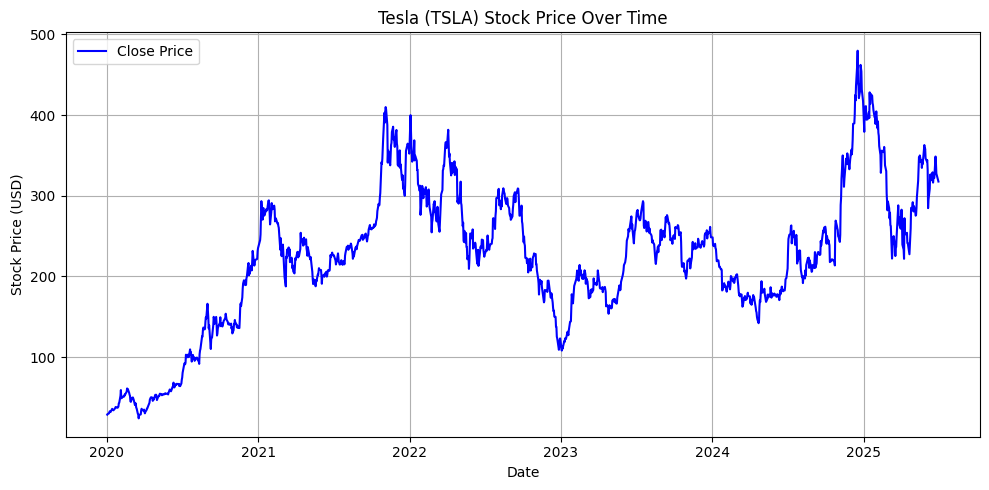

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
tesla_data = pd.read_csv("tesla_stock_data.csv")
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'], utc=True)
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
make_graph(tesla_data, "Tesla (TSLA) Stock Price Over Time")

Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

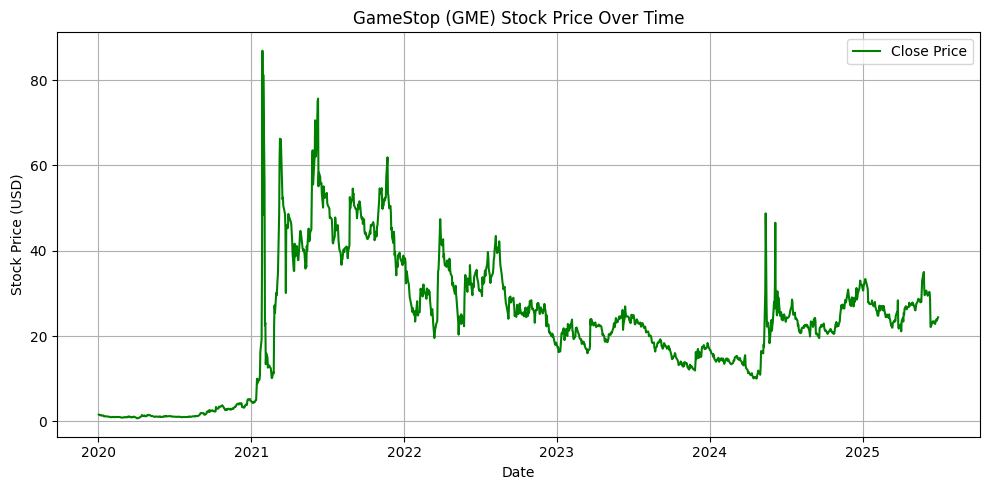

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
gme_data = pd.read_csv("gme_stock_data.csv")
gme_data['Date'] = pd.to_datetime(gme_data['Date'], utc=True)
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
make_graph(gme_data, "GameStop (GME) Stock Price Over Time")